# Bluff Predictions


In this notebook, a dataframe with different betting actions and card values is used to predict if a river bet by an opponent is a bluff or not. This is a small parameter set (only a few columns) and is within the following restraints:

1. There is a single river bet that is called - otherwise the players cards will not be shown. Instances where the bet is folded is the dataset on which we want to predict if the bet was a bluff
2. There are no reraises on the river - the bet is always just called
3. The data does not include Hero's hands - as there are many more of these than the player pool data set this would give a heavily biased data set.
4. The player in the data point raises pre-flop and does not face a 3-bet.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Bluff_Prediction/bluff_data.csv")

In [2]:
df

,Player Name,Flop Card 1,Flop Card 2,Flop Card 3,Turn Card,River Card,Player Cards,Suited Hand,Suited Hand Suit,Best Ranking,Flop Raise,Turn Raise,Bet Size Flop (fraction of pot),Bet Size Turn (fraction of pot),Bet Size River (fraction of pot),Big Blind,All In,All In Street
0,Gopnik74,5d,Ks,6d,Kh,8s,A8o,False,NaN,Two Pair,True,True,0.56,0.47,0.49,0.02,False,NaN
1,psychopathko,3d,Qc,As,2h,Ac,KQo,False,NaN,Two Pair,False,NaN,NaN,NaN,0.36,0.02,False,NaN
2,choutyatam,Td,7s,8d,Kc,Kh,T8s,True,c,Two Pair,True,True,0.70,0.73,0.47,0.02,False,NaN
3,vito-lysyi,Td,3s,9s,Ac,8h,77,False,NaN,One Pair,NaN,True,NaN,0.44,0.47,0.02,False,NaN
4,Markovich988,9d,As,Qd,Kc,6c,A5o,False,NaN,One Pair,True,True,0.22,0.06,0.06,0.02,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Xsive74,6d,7s,3c,As,Ah,J9o,False,NaN,One Pair,True,NaN,0.45,NaN,0.48,0.02,False,NaN
1289,George Napox,9s,2d,6s,9h,6c,65o,False,NaN,Full House,NaN,True,NaN,0.46,0.98,0.02,False,NaN
1290,l1nh4tt1,Jd,4s,3s,4h,Ks,Q9s,True,s,Flush,NaN,True,NaN,0.69,0.65,0.02,False,NaN
1291,Querkes,5c,8s,6d,7h,4d,A9o,False,NaN,Straight,False,False,NaN,NaN,2.16,0.02,False,NaN


In [3]:
df.shape

(1293, 18)

So there are around 1300 data entries. A lot for most purposes but in poker terms actually quite limited. We now want to see what is the ranking of hand they have at showdown (when cards are revealed)

In [4]:
100 * df.groupby("Best Ranking")["Best Ranking"].count() / len(df)

Best Ranking
Flush               8.352668
Four-Of-A-Kind      0.386698
Full House          7.424594
High Card           7.347254
One Pair           30.239753
Straight            9.667440
Three-Of-A-Kind     9.667440
Two Pair           26.914153
Name: Best Ranking, dtype: float64

7.3 % of hands shown at showdown are with the lowest ranking - a high card. Although higher rankings can occasionaly be turned in to a bluff by the river (imagine having 22 on AKQT9 for example) for the sake of simplicity we say that a high card bet on the river is a bluff while all other ranks better are classified as a value bet (where the player was betting because they thought they had the best hand). The beautiful complexity of poker means there are many, many edge cases where these rules may not hold, but for a first model this is the simplest implementation. We now want to encode the best ranking to either bluff or value.

In [5]:
df["Bluff"] = np.where(df["Best Ranking"] == 'High Card', 1, 0)
df.head()

,Player Name,Flop Card 1,Flop Card 2,Flop Card 3,Turn Card,River Card,Player Cards,Suited Hand,Suited Hand Suit,Best Ranking,Flop Raise,Turn Raise,Bet Size Flop (fraction of pot),Bet Size Turn (fraction of pot),Bet Size River (fraction of pot),Big Blind,All In,All In Street,Bluff
0,Gopnik74,5d,Ks,6d,Kh,8s,A8o,False,NaN,Two Pair,True,True,0.56,0.47,0.49,0.02,False,NaN,0
1,psychopathko,3d,Qc,As,2h,Ac,KQo,False,NaN,Two Pair,False,NaN,NaN,NaN,0.36,0.02,False,NaN,0
2,choutyatam,Td,7s,8d,Kc,Kh,T8s,True,c,Two Pair,True,True,0.70,0.73,0.47,0.02,False,NaN,0
3,vito-lysyi,Td,3s,9s,Ac,8h,77,False,NaN,One Pair,NaN,True,NaN,0.44,0.47,0.02,False,NaN,0
4,Markovich988,9d,As,Qd,Kc,6c,A5o,False,NaN,One Pair,True,True,0.22,0.06,0.06,0.02,False,NaN,0


1\. Player Cards
---

Currently the 'Player Cards' feature has the suitedness of the hand in it. We have a separate feature for this so we will remove the trailing suitedness from 'Player Cards.

In [6]:
df["Player Cards"] = (df['Player Cards']).where(df['Player Cards'].str.len() < 2, df['Player Cards'].str[0:2])
df["Player Cards"]

0       A8
1       KQ
2       T8
3       77
4       A5
        ..
1288    J9
1289    65
1290    Q9
1291    A9
1292    AA
Name: Player Cards, Length: 1293, dtype: object

2\. Flop Card Values
---
The Flop cards have no inherent order and only the values and suits need to be considered. For the purposes of a simple model we are going to decouple the suit and value of each card. We then reorder these (value on high to low and suit in alphabetical order).

In [7]:
value_mappings = {
    'A': 14,
    'K': 13,
    'Q': 12,
    'J': 11,
    'T': 10,
    '9': 9,
    '8': 8,
    '7': 7,
    '6': 6,
    '5': 5,
    '4': 4,
    '3': 3,
    '2': 2,
}

df["Flop Cards Encoded"] = df["Flop Card 1"].str[0] + df["Flop Card 2"].str[0] + df["Flop Card 3"].str[0]
list_of_encoded_cards = df["Flop Cards Encoded"].to_list()

for i in range(len(list_of_encoded_cards)):
    list_of_encoded_cards[i] = ''.join(sorted(list_of_encoded_cards[i], key=lambda x: value_mappings[x], reverse=True))
df["Flop Cards Encoded"] = list_of_encoded_cards
df["Flop Cards Encoded"]

0       K65
1       AQ3
2       T87
3       T93
4       AQ9
       ... 
1288    763
1289    962
1290    J43
1291    865
1292    K65
Name: Flop Cards Encoded, Length: 1293, dtype: object

If we group each of these flops and count the number of times they appear, we can see that the data is very sparse with many flops found only a single time. Perhaps then this model works best with 3 unique features instead of a single aggregated flop feature.

In [8]:
df["Flop Card 1 Value"] = df["Flop Cards Encoded"].str[0]
df["Flop Card 2 Value"] = df["Flop Cards Encoded"].str[1]
df["Flop Card 3 Value"] = df["Flop Cards Encoded"].str[2]
df["Turn Card Value"] = df["Turn Card"].str[0]
df["River Card Value"] = df["River Card"].str[0]


3\. Flop Suits
---

We want to change the flop suits from specific suits to the actual meaning of the number of these suits. There are a few different ways to construct this but the simplest is to give each flop a label of the following:

- 'rainbow' where all 3 cards have different suits i.e. aaa
- 'two-tone' where 2 cards have the same suit i.e. aab
- 'monotone' where all 3 cards have the same suit i.e. abc

This requires a single feature. For the turn this needs extended to

- 'rainbow' i.e. abc d
- 'single flush draw' i.e. abc a

- 'double flush draw' i.e. aab b
- 'flush completing' i.e. aab a
- 'two-tone blank' i.e. aab c

- 'four flush' i.e. aaa a
- 'monotone blank' i.e. aaa b

and finally on the river the 24 possible combinations are:

- abc d a
- abc d b
- abc d c
- abc d d

- abc a a
- abc a b
- abc a c
- abc a d

- aab b a
- aab b b
- aab b c

- aab a a
- aab a b
- aab a c

- aab c a
- aab c b
- aab c c
- aab c d

- aaa a a
- aaa a b

- aaa b a
- aaa b b
- aaa b c

In [9]:
from collections import Counter

df['Board Suit'] = df["Flop Card 1"].str[1] + df["Flop Card 2"].str[1] + df["Flop Card 3"].str[1] + df["Turn Card"].str[
    1] + df["River Card"].str[1]

list_of_encoded_cards = df["Board Suit"].to_list()

for i in range(len(list_of_encoded_cards)):

    # count most common suits
    counter = Counter(list_of_encoded_cards[i][0:3])
    for suit in ['c', 'd', 'h', 's']:
        if suit not in counter:
            counter[suit] = 0

    # order by most common
    list_of_encoded_cards[i] = ''.join(sorted(list_of_encoded_cards[i], key=lambda x: counter[x], reverse=True))
    letters = 'abcd'

    # looping through every character in the string and replacing with the first 4 letters of the alphabet
    new_string = ''
    mapping = {}
    k = 0
    for j in list_of_encoded_cards[i]:
        if j not in mapping:
            mapping[j] = letters[k]
            k += 1
        new_string += mapping[j]

    list_of_encoded_cards[i] = new_string

df["Board Suit"] = list_of_encoded_cards
df["Board Suit"]

0       aabbc
1       abcbd
2       aabcd
3       aabcd
4       aabcc
        ...  
1288    abcbd
1289    aabcd
1290    aaabc
1291    abccd
1292    aaabc
Name: Board Suit, Length: 1293, dtype: object

4\. Bet Sizing
===
The almost infinite number of bet sizes gives us another problem with dealing with very sparse data


In [10]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

bet_sizes_flop = df["Bet Size Flop (fraction of pot)"].groupby(df["Bet Size Flop (fraction of pot)"]).count()
bet_sizes_turn = df["Bet Size Turn (fraction of pot)"].groupby(df["Bet Size Turn (fraction of pot)"]).count()
bet_sizes_river = df["Bet Size River (fraction of pot)"].groupby(df["Bet Size River (fraction of pot)"]).count()


(0.0, 110.0)

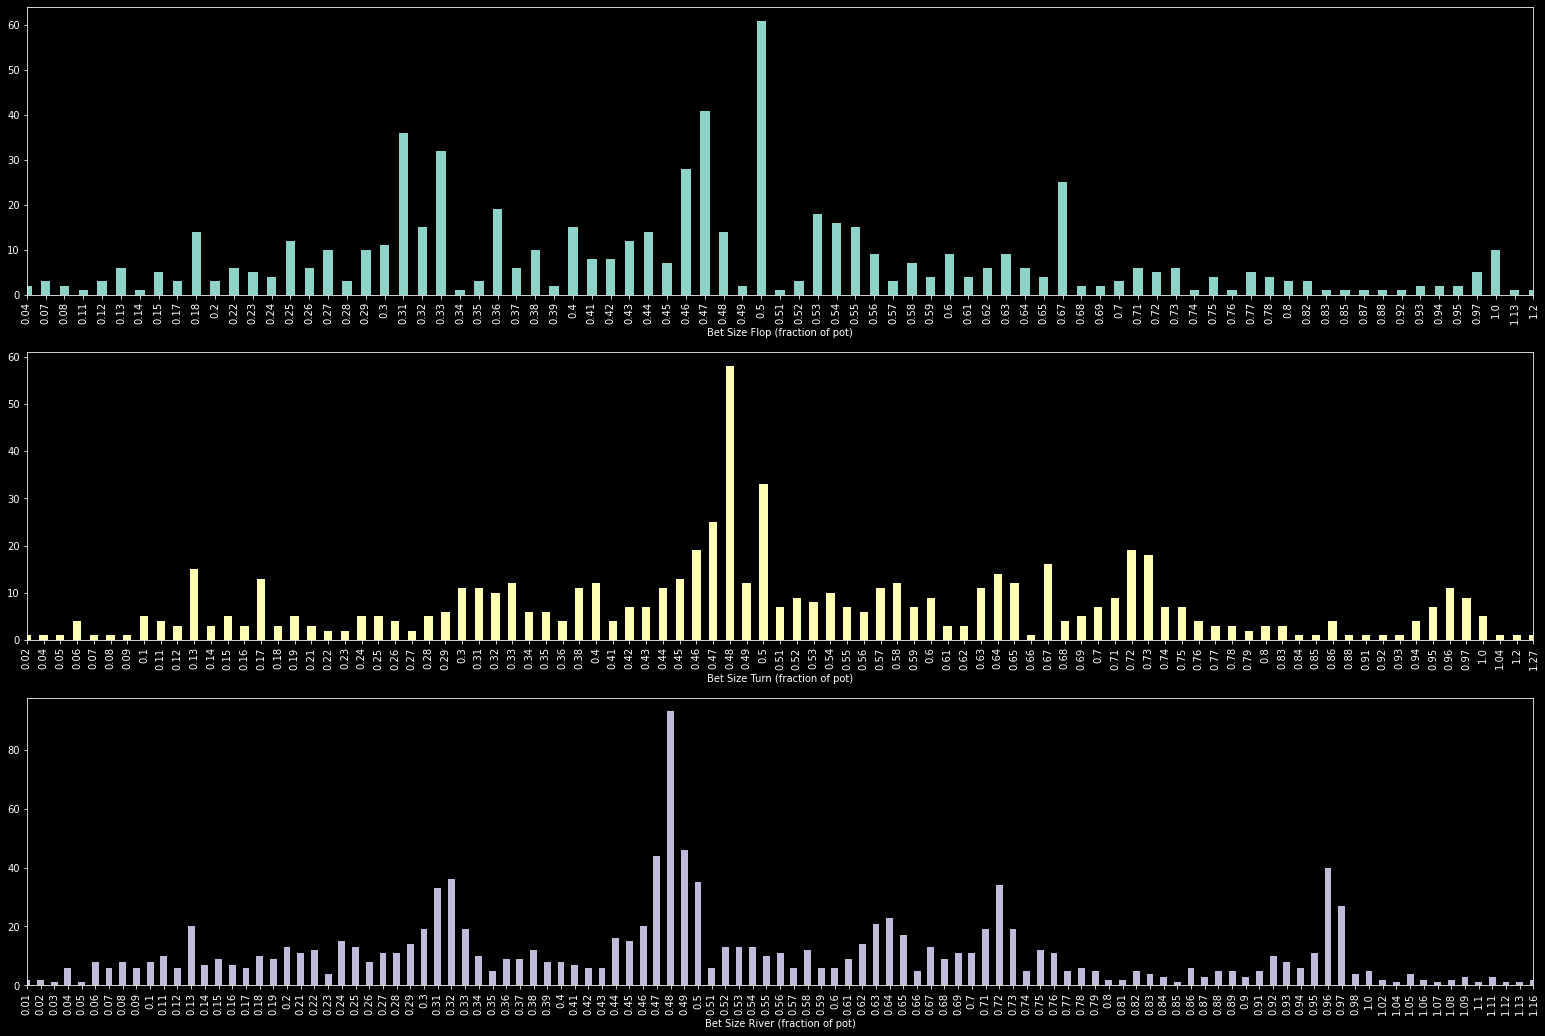

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(27, 18))
bet_sizes_flop.plot.bar(ax=axes[0], color=colours[0])
bet_sizes_turn.plot.bar(ax=axes[1], color=colours[1])
bet_sizes_river.plot.bar(ax=axes[2], color=colours[2])

axes[0].set_xlim(0, 80)
axes[1].set_xlim(0, 90)
axes[2].set_xlim(0, 110)


There are a few distinct regions here with 33 %, 50%, 67%, and 100 % pot being modelled chosen the most frequently. For simplicity, we therefore pick the following sizings

- Min
- 33 %
- 50 %
- 67 %
- 100+ %

In [12]:
col = ['Bet Size Flop (fraction of pot)', 'Bet Size Turn (fraction of pot)', 'Bet Size River (fraction of pot)']
conditions = [
    (df[col] <= 0.2),
    (0.2 < df[col]) & (df[col] <= 0.4),
    (0.4 < df[col]) & (df[col] <= 0.6),
    (0.6 < df[col]) & (df[col] <= 0.9),
    (0.9 < df[col]),
]
choices = ["min", '33%', '50%', '67%', '100+%']

df[["Flop Bet Size", "Turn Bet Size", "River Bet Size"]] = np.select(conditions, choices, default=np.nan)
df[["Flop Bet Size", "Turn Bet Size", "River Bet Size"]]

,Flop Bet Size,Turn Bet Size,River Bet Size
0,50%,50%,50%
1,nan,nan,33%
2,67%,67%,50%
3,nan,50%,50%
4,33%,min,min
...,...,...,...
1288,50%,nan,50%
1289,nan,50%,100+%
1290,nan,67%,67%
1291,nan,nan,100+%


In [ ]:
df.drop(["Flop Card 1", "Flop Card 2", "Flop Card 3", "Turn Card", "River Card", "Flop Cards Encoded",
         "Bet Size Flop (fraction of pot)", "Bet Size Turn (fraction of pot)", "Bet Size River (fraction of pot)", "Suited Hand Suit"],
        axis=1,
        inplace=True)

In [18]:
df = df[
    [
        'Player Name',
        'Flop Card 1 Value',
        'Flop Card 2 Value',
        'Flop Card 3 Value',
        'Turn Card Value',
        'River Card Value',
        'Player Cards',
        'Suited Hand',
        'Board Suit',
        'Flop Raise',
        'Turn Raise',
        'Flop Bet Size',
        'Turn Bet Size',
        'River Bet Size',
        'All In',
        'All In Street',
        'Big Blind',
        'Best Ranking',
        'Bluff'
    ]
]
df.to_csv("./bluff_data_clean.csv")

We denote a bluff as the positive case (1) while a value bet is the negative case (0)

KeyError: "['Flop Card 1', 'Bet Size Flop (fraction of pot)', 'Bet Size River (fraction of pot)', 'Flop Card 3', 'River Card', 'Flop Card 2', 'Suited Hand Suit', 'Turn Card', 'Bet Size Turn (fraction of pot)'] not in index"